In [1]:
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(4,8), padding='valid',strides=1
                 ,activation='relu', input_shape=(3714,56,1,)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,8), padding='valid', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), padding='valid', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3711, 49, 64)      2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1855, 24, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1852, 17, 32)      65568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 926, 8, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 923, 5, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 461, 2, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29504)             0         
__________

In [41]:
from keras import backend as K

def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [44]:
import numpy as np
path = '/Volumes/Storage/0.SAGAbackup/ARData/'

ytest=np.load(path+'ytest.npy')
ytrain=np.load(path+'ytrain.npy')
xtest=np.load(path+'xtest.npy')
xtrain=np.load(path+'xtrain.npy')
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',
                    single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5)])
hist = model.fit(xtrain,ytrain,batch_size=171,epochs=10,validation_split=0.2)

Train on 342 samples, validate on 86 samples
Epoch 1/10
342/342 [==============================] - 164s 480ms/step - loss: 0.1674 - acc: 0.9352 - prec: 0.9286 - recall: 0.0635 - prec_1: 0.5221 - recall_1: 0.8295 - prec_2: 0.2663 - recall_2: 0.7450 - prec_3: 0.3539 - recall_3: 0.7750 - prec_4: 0.2837 - recall_4: 0.8750 - prec_5: 0.2334 - recall_5: 0.5804 - val_loss: 0.3933 - val_acc: 0.9089 - val_prec: 1.0000 - val_recall: 0.0517 - val_prec_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_prec_2: 0.1905 - val_recall_2: 0.3077 - val_prec_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_prec_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_prec_5: 0.2143 - val_recall_5: 0.3000
Epoch 2/10
342/342 [==============================] - 162s 474ms/step - loss: 0.1392 - acc: 0.9488 - prec: 0.9643 - recall: 0.1352 - prec_1: 0.3611 - recall_1: 0.7202 - prec_2: 0.4881 - recall_2: 0.5446 - prec_3: 0.2227 - recall_3: 0.7350 - prec_4: 0.3883 - recall_4: 0.7738 - prec_5: 0.3188 - recall_5: 0.8619 - val_loss: 

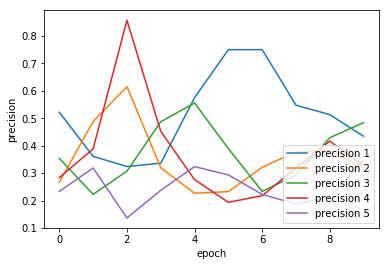

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['prec_1'], label='precision 1')
plt.plot(hist.history['prec_2'], label='precision 2')
plt.plot(hist.history['prec_3'], label='precision 3')
plt.plot(hist.history['prec_4'], label='precision 4')
plt.plot(hist.history['prec_5'], label='precision 5')

plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(loc='lower right')
plt.show()

In [5]:
score=model.evaluate(xtest,ytest)
print(score)

107/107 [==============================] - 12s 109ms/step
[0.36302879745158079, 0.90342678366420426]


In [67]:
model.save(path+'alienrescue_keras_model_auc9065.h5')

In [18]:
xtest.shape

(107, 3714, 56, 1)

In [47]:
x1 = xtest[[2,3]]

y1= model.predict(x1)
y1

array([[  2.82029964e-06,   9.46348064e-06,   1.08038005e-03,
          4.73681212e-07,   1.26551220e-06,   2.66750739e-03],
       [  8.60522960e-08,   1.08845875e-07,   2.59775959e-04,
          4.26733124e-07,   9.44865285e-04,   6.43796000e-07]], dtype=float32)

In [37]:
ytest[[2,3]]

array([[1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])